In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("TelcoCustomerChurn.csv")
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [3]:
df.shape

(7043, 21)

In [4]:
df.groupby(by=['Churn'])['gender'].count() #imbalanced data set

Churn
No     5174
Yes    1869
Name: gender, dtype: int64

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.isnull().sum() # if any null values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
# drop customer id column

df.drop("customerID", axis='columns', inplace=True)
df.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [10]:
# convert TotalCharges column to float64 rather than object : it is possible it could have space

pd.to_numeric(df["TotalCharges"])

ValueError: Unable to parse string " " at position 488

In [12]:
pd.to_numeric(df['TotalCharges'], errors='coerce').isna().sum() #coerce is convert errors per row to NaN

11

In [13]:
df["TotalCharges"]=pd.to_numeric(df['TotalCharges'], errors='coerce')

In [14]:
df[pd.to_numeric(df['TotalCharges'], errors='coerce').isnull()]

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     Yes        Yes       0          Yes   
3826    Male              0     Yes        Yes       0          Yes   
4380  Female              0     Yes        Yes       0          Yes   
5218    Male              0     Yes        Yes       0          Yes   
6670  Female              0     Yes        Yes       0          Yes   
6754    Male              0      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 No              No  No internet service   
936                 No             DSL                  Yes   
1082               Yes              No  No internet service   
1340  No phone service             DSL                  Yes   
3331                No              No  No internet service   
3826               Yes              No  No internet service   
4380                No              No  No internet service   
5218                No              No  No internet service   
6670               Yes             DSL                   No   
6754               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges  TotalCharges Churn  
488   Bank transfer (automatic)           52.55           NaN    No  
753                Mailed check           20.25           NaN    No  
936                Mailed check           80.85           NaN    No  
1082               Mailed check           25.75           NaN    No  
1340    Credit card (automatic)           56.05           NaN    No  
3331               Mailed check           19.85           NaN    No  
3826               Mailed check           25.35           NaN    No  
4380               Mailed check           20.00           

In [15]:
df.iloc[488]['TotalCharges']

nan

In [16]:
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].median()) #fill with median of column

In [17]:
df.iloc[488]['TotalCharges']

1397.475

In [18]:
df.describe(include='all')

gender  SeniorCitizen Partner Dependents       tenure PhoneService  \
count    7043    7043.000000    7043       7043  7043.000000         7043   
unique      2            NaN       2          2          NaN            2   
top      Male            NaN      No         No          NaN          Yes   
freq     3555            NaN    3641       4933          NaN         6361   
mean      NaN       0.162147     NaN        NaN    32.371149          NaN   
std       NaN       0.368612     NaN        NaN    24.559481          NaN   
min       NaN       0.000000     NaN        NaN     0.000000          NaN   
25%       NaN       0.000000     NaN        NaN     9.000000          NaN   
50%       NaN       0.000000     NaN        NaN    29.000000          NaN   
75%       NaN       0.000000     NaN        NaN    55.000000          NaN   
max       NaN       1.000000     NaN        NaN    72.000000          NaN   

       MultipleLines InternetService OnlineSecurity OnlineBackup  \
count           7043            7043           7043         7043   
unique             3               3              3            3   
top               No     Fiber optic             No           No   
freq            3390            3096           3498         3088   
mean             NaN             NaN            NaN          NaN   
std              NaN             NaN            NaN          NaN   
min              NaN             NaN            NaN          NaN   
25%              NaN             NaN            NaN          NaN   
50%              NaN             NaN            NaN          NaN   
75%              NaN             NaN            NaN          NaN   
max              NaN             NaN            NaN          NaN   

       DeviceProtection TechSupport StreamingTV StreamingMovies  \
count              7043        7043        7043            7043   
unique                3           3           3               3   
top                  No          No          No              No   
freq               3095        3473        2810            2785   
mean                NaN         NaN         NaN             NaN   
std                 NaN         NaN         NaN             NaN   
min                 NaN         NaN         NaN             NaN   
25%                 NaN         NaN         NaN             NaN   
50%                 NaN         NaN         NaN             NaN   
75%                 NaN         NaN         NaN             NaN   
max                 NaN         NaN         NaN             NaN   

              Contract PaperlessBilling     PaymentMethod  MonthlyCharges  \
count             7043             7043              7043     7043.000000   
unique               3                2                 4             NaN   
top     Month-to-month              Yes  Electronic check             NaN   
freq              3875             4171              2365             NaN   
mean               NaN              NaN               NaN       64.761692   
std                NaN              NaN               NaN       30.090047   
min                NaN              NaN               NaN       18.250000   
25%                NaN              NaN               NaN       35.500000   
50%                NaN              NaN               NaN       70.350000   
75%                NaN              NaN               NaN       89.850000   
max                NaN              NaN               NaN      118.750000   

        TotalCharges Churn  
count    7043.000000  7043  
unique           NaN     2  
top              NaN    No  
freq             NaN  5174  
mean     2281.916928   NaN  
std      2265.270398   NaN  
min        18.800000   NaN  
25%       402.225000   NaN  
50%      1397.475000   NaN  
75%      3786.600000   NaN  
max      8684.800000   NaN

In [19]:
df.groupby(by=['Churn'])['tenure'].mean()

Churn
No     37.569965
Yes    17.979133
Name: tenure, dtype: float64

Text(0.5, 1.0, 'Tenure vs Churn')

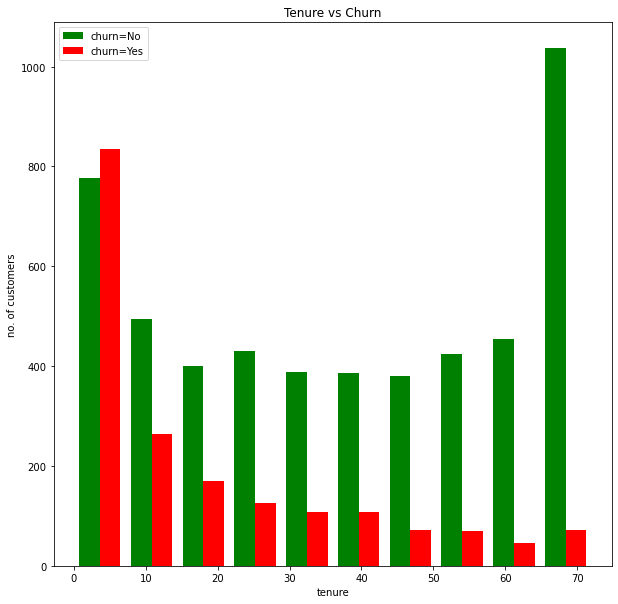

In [20]:
plt.figure(figsize=(10,10))
plt.hist([df[df['Churn']=='No']['tenure'], df[df['Churn']=='Yes']['tenure']], color=["green","red"], label=['churn=No',"churn=Yes"])
plt.legend()
plt.xlabel('tenure')
plt.ylabel('no. of customers')
plt.title('Tenure vs Churn')

Text(0.5, 1.0, 'MonthlyCharges vs Churn')

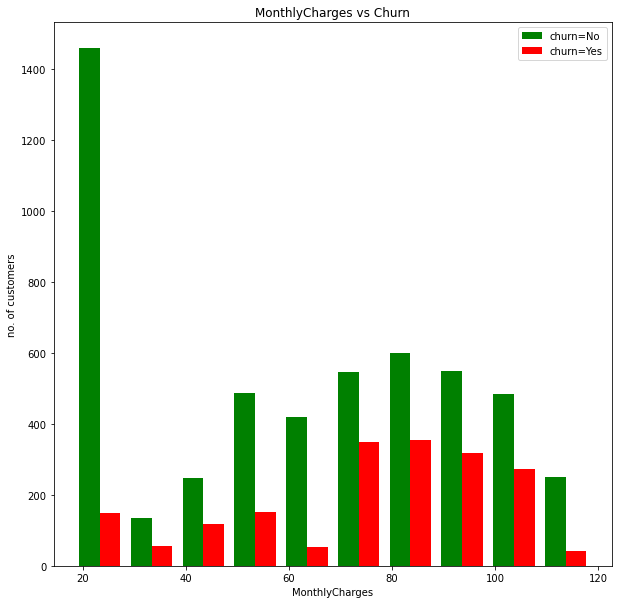

In [21]:
plt.figure(figsize=(10,10))
plt.hist([df[df['Churn']=='No']['MonthlyCharges'], df[df['Churn']=='Yes']['MonthlyCharges']], color=["green","red"], label=['churn=No',"churn=Yes"])
plt.legend()
plt.xlabel('MonthlyCharges')
plt.ylabel('no. of customers')
plt.title('MonthlyCharges vs Churn')

In [22]:
def print_uniq_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column} {df[column].unique()}')
            
            
print_uniq_col_values(df)

gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


In [23]:
# replace 'no internet serevice' with 'No'

df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)
print_uniq_col_values(df)

gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes']
OnlineBackup ['Yes' 'No']
DeviceProtection ['No' 'Yes']
TechSupport ['No' 'Yes']
StreamingTV ['No' 'Yes']
StreamingMovies ['No' 'Yes']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


In [24]:
df.replace({"Yes":1,"No":0}, inplace=True)
print_uniq_col_values(df)

gender ['Female' 'Male']
InternetService ['DSL' 'Fiber optic' 0]
Contract ['Month-to-month' 'One year' 'Two year']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [25]:
for col in df:
    print(f'{col} {df[col].unique()}')

gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner [1 0]
Dependents [0 1]
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService [0 1]
MultipleLines [0 1]
InternetService ['DSL' 'Fiber optic' 0]
OnlineSecurity [0 1]
OnlineBackup [1 0]
DeviceProtection [0 1]
TechSupport [0 1]
StreamingTV [0 1]
StreamingMovies [0 1]
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling [1 0]
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn [0 1]


In [26]:
df['gender'] = df['gender'].replace({'Female':0,'Male':1})
df.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines InternetService  OnlineSecurity  OnlineBackup  \
0              0             DSL               0             1   
1              0             DSL               1             0   
2              0             DSL               1             1   
3              0             DSL               1             0   
4              0     Fiber optic               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
0                 0            0            0                0   
1                 1            0            0                0   
2                 0            0            0                0   
3                 1            1            0                0   
4                 0            0            0                0   

         Contract  PaperlessBilling              PaymentMethod  \
0  Month-to-month                 1           Electronic check   
1        One year                 0               Mailed check   
2  Month-to-month                 1               Mailed check   
3        One year                 0  Bank transfer (automatic)   
4  Month-to-month                 1           Electronic check   

   MonthlyCharges  TotalCharges  Churn  
0           29.85         29.85      0  
1           56.95       1889.50      0  
2           53.85        108.15      1  
3           42.30       1840.75      0  
4           70.70        151.65      1

In [27]:
# one hot encoding

df1 = pd.get_dummies(data=df,columns=['InternetService','Contract','PaymentMethod'])
df1.sample(4)

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
3381       0              0        0           0      41             1   
5166       1              0        0           0      61             1   
6917       0              0        1           0      72             1   
2759       1              0        0           0       1             1   

      MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
3381              0               1             0                 1  ...   
5166              1               1             0                 1  ...   
6917              1               1             1                 0  ...   
2759              0               0             0                 0  ...   

      InternetService_0  InternetService_DSL  InternetService_Fiber optic  \
3381                  0                    1                            0   
5166                  0                    0                            1   
6917                  0                    0                            1   
2759                  1                    0                            0   

      Contract_Month-to-month  Contract_One year  Contract_Two year  \
3381                        0                  1                  0   
5166                        0                  1                  0   
6917                        0                  0                  1   
2759                        1                  0                  0   

      PaymentMethod_Bank transfer (automatic)  \
3381                                        1   
5166                                        0   
6917                                        1   
2759                                        1   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
3381                                      0                               0   
5166                                      0                               1   
6917                                      0                               0   
2759                                      0                               0   

      PaymentMethod_Mailed check  
3381                           0  
5166                           0  
6917                           0  
2759                           0  

[4 rows x 27 columns]

In [28]:
df1.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_0                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic    

In [29]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler #MinMaxScaler put all values between 0 and 1

scaler = MinMaxScaler()

df1[cols_to_scale]=scaler.fit_transform(df1[cols_to_scale])
df1.sample(4)

gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
1005       0              1        1           0  0.736111             1   
2567       1              0        1           0  0.833333             1   
5334       0              0        1           1  0.680556             1   
6403       1              0        1           1  1.000000             1   

      MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
1005              1               0             0                 0  ...   
2567              1               0             1                 1  ...   
5334              1               0             1                 1  ...   
6403              1               1             1                 1  ...   

      InternetService_0  InternetService_DSL  InternetService_Fiber optic  \
1005                  0                    0                            1   
2567                  0                    0                            1   
5334                  0                    0                            1   
6403                  0                    0                            1   

      Contract_Month-to-month  Contract_One year  Contract_Two year  \
1005                        0                  1                  0   
2567                        1                  0                  0   
5334                        0                  0                  1   
6403                        0                  0                  1   

      PaymentMethod_Bank transfer (automatic)  \
1005                                        0   
2567                                        0   
5334                                        1   
6403                                        1   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
1005                                      1                               0   
2567                                      0                               1   
5334                                      0                               0   
6403                                      0                               0   

      PaymentMethod_Mailed check  
1005                           0  
2567                           0  
5334                           0  
6403                           0  

[4 rows x 27 columns]

In [30]:
X = df1.drop('Churn',axis='columns')
y = df1['Churn']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(len(X_train),len(X_test))

5634 1409


In [32]:
X_train.shape[1]

26

In [33]:
model = keras.Sequential([
    keras.layers.Dense(X_train.shape[1], input_shape=(26,), activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

In [34]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train, y_train, epochs=500)

Epoch 1/500
177/177 [==============================] - 0s 541us/step - loss: 0.5014 - accuracy: 0.7354
Epoch 2/500
177/177 [==============================] - 0s 541us/step - loss: 0.4263 - accuracy: 0.7969
Epoch 3/500
177/177 [==============================] - 0s 563us/step - loss: 0.4226 - accuracy: 0.7977
Epoch 4/500
177/177 [==============================] - 0s 552us/step - loss: 0.4170 - accuracy: 0.8030
Epoch 5/500
177/177 [==============================] - 0s 547us/step - loss: 0.4136 - accuracy: 0.8071
Epoch 6/500
177/177 [==============================] - 0s 540us/step - loss: 0.4130 - accuracy: 0.8019
Epoch 7/500
177/177 [==============================] - 0s 536us/step - loss: 0.4109 - accuracy: 0.8076
Epoch 8/500
177/177 [==============================] - 0s 575us/step - loss: 0.4092 - accuracy: 0.8067
Epoch 9/500
177/177 [==============================] - 0s 533us/step - loss: 0.4071 - accuracy: 0.8103
Epoch 10/500
177/177 [==============================] - 0s 518us/step - l

177/177 [==============================] - 0s 587us/step - loss: 0.3140 - accuracy: 0.8555
Epoch 78/500
177/177 [==============================] - 0s 614us/step - loss: 0.3138 - accuracy: 0.8548
Epoch 79/500
177/177 [==============================] - 0s 603us/step - loss: 0.3098 - accuracy: 0.8601
Epoch 80/500
177/177 [==============================] - 0s 614us/step - loss: 0.3106 - accuracy: 0.8545
Epoch 81/500
177/177 [==============================] - 0s 620us/step - loss: 0.3095 - accuracy: 0.8596
Epoch 82/500
177/177 [==============================] - 0s 609us/step - loss: 0.3102 - accuracy: 0.8582
Epoch 83/500
177/177 [==============================] - 0s 603us/step - loss: 0.3087 - accuracy: 0.8601
Epoch 84/500
177/177 [==============================] - 0s 547us/step - loss: 0.3075 - accuracy: 0.8591
Epoch 85/500
177/177 [==============================] - 0s 552us/step - loss: 0.3062 - accuracy: 0.8612
Epoch 86/500
177/177 [==============================] - 0s 564us/step - loss:

177/177 [==============================] - 0s 732us/step - loss: 0.2342 - accuracy: 0.8953
Epoch 156/500
177/177 [==============================] - 0s 530us/step - loss: 0.2337 - accuracy: 0.8971
Epoch 157/500
177/177 [==============================] - 0s 541us/step - loss: 0.2346 - accuracy: 0.8972
Epoch 158/500
177/177 [==============================] - 0s 535us/step - loss: 0.2322 - accuracy: 0.9018
Epoch 159/500
177/177 [==============================] - 0s 563us/step - loss: 0.2304 - accuracy: 0.9018
Epoch 160/500
177/177 [==============================] - 0s 623us/step - loss: 0.2315 - accuracy: 0.8962
Epoch 161/500
177/177 [==============================] - 0s 533us/step - loss: 0.2299 - accuracy: 0.9006
Epoch 162/500
177/177 [==============================] - 0s 535us/step - loss: 0.2304 - accuracy: 0.8985
Epoch 163/500
177/177 [==============================] - 0s 682us/step - loss: 0.2295 - accuracy: 0.8978
Epoch 164/500
177/177 [==============================] - 0s 732us/ste

177/177 [==============================] - 0s 530us/step - loss: 0.1884 - accuracy: 0.9214
Epoch 234/500
177/177 [==============================] - 0s 614us/step - loss: 0.1857 - accuracy: 0.9262
Epoch 235/500
177/177 [==============================] - 0s 530us/step - loss: 0.1871 - accuracy: 0.9194
Epoch 236/500
177/177 [==============================] - 0s 524us/step - loss: 0.1868 - accuracy: 0.9235
Epoch 237/500
177/177 [==============================] - 0s 530us/step - loss: 0.1890 - accuracy: 0.9230
Epoch 238/500
177/177 [==============================] - 0s 524us/step - loss: 0.1851 - accuracy: 0.9205
Epoch 239/500
177/177 [==============================] - 0s 518us/step - loss: 0.1822 - accuracy: 0.9265
Epoch 240/500
177/177 [==============================] - 0s 524us/step - loss: 0.1823 - accuracy: 0.9249
Epoch 241/500
177/177 [==============================] - 0s 686us/step - loss: 0.1848 - accuracy: 0.9235
Epoch 242/500
177/177 [==============================] - 0s 693us/ste

177/177 [==============================] - 0s 530us/step - loss: 0.1565 - accuracy: 0.9340
Epoch 312/500
177/177 [==============================] - 0s 563us/step - loss: 0.1560 - accuracy: 0.9359
Epoch 313/500
177/177 [==============================] - 0s 533us/step - loss: 0.1559 - accuracy: 0.9341
Epoch 314/500
177/177 [==============================] - 0s 518us/step - loss: 0.1633 - accuracy: 0.9347
Epoch 315/500
177/177 [==============================] - 0s 518us/step - loss: 0.1547 - accuracy: 0.9407
Epoch 316/500
177/177 [==============================] - 0s 522us/step - loss: 0.1549 - accuracy: 0.9352
Epoch 317/500
177/177 [==============================] - 0s 529us/step - loss: 0.1583 - accuracy: 0.9341
Epoch 318/500
177/177 [==============================] - 0s 524us/step - loss: 0.1558 - accuracy: 0.9338
Epoch 319/500
177/177 [==============================] - 0s 530us/step - loss: 0.1541 - accuracy: 0.9370
Epoch 320/500
177/177 [==============================] - 0s 513us/ste

177/177 [==============================] - 0s 568us/step - loss: 0.1353 - accuracy: 0.9400
Epoch 390/500
177/177 [==============================] - 0s 524us/step - loss: 0.1328 - accuracy: 0.9436
Epoch 391/500
177/177 [==============================] - 0s 523us/step - loss: 0.1363 - accuracy: 0.9437
Epoch 392/500
177/177 [==============================] - 0s 524us/step - loss: 0.1351 - accuracy: 0.9427
Epoch 393/500
177/177 [==============================] - 0s 571us/step - loss: 0.1330 - accuracy: 0.9448
Epoch 394/500
177/177 [==============================] - 0s 524us/step - loss: 0.1318 - accuracy: 0.9475
Epoch 395/500
177/177 [==============================] - 0s 518us/step - loss: 0.1358 - accuracy: 0.9418
Epoch 396/500
177/177 [==============================] - 0s 541us/step - loss: 0.1374 - accuracy: 0.9423
Epoch 397/500
177/177 [==============================] - 0s 524us/step - loss: 0.1361 - accuracy: 0.9411
Epoch 398/500
177/177 [==============================] - 0s 518us/ste

177/177 [==============================] - 0s 524us/step - loss: 0.1232 - accuracy: 0.9462
Epoch 468/500
177/177 [==============================] - 0s 524us/step - loss: 0.1243 - accuracy: 0.9499
Epoch 469/500
177/177 [==============================] - 0s 530us/step - loss: 0.1231 - accuracy: 0.9475
Epoch 470/500
177/177 [==============================] - 0s 535us/step - loss: 0.1229 - accuracy: 0.9496
Epoch 471/500
177/177 [==============================] - 0s 524us/step - loss: 0.1213 - accuracy: 0.9501
Epoch 472/500
177/177 [==============================] - 0s 577us/step - loss: 0.1240 - accuracy: 0.9473
Epoch 473/500
177/177 [==============================] - 0s 530us/step - loss: 0.1204 - accuracy: 0.9499
Epoch 474/500
177/177 [==============================] - 0s 530us/step - loss: 0.1221 - accuracy: 0.9464
Epoch 475/500
177/177 [==============================] - 0s 530us/step - loss: 0.1241 - accuracy: 0.9443
Epoch 476/500
177/177 [==============================] - 0s 518us/ste

In [35]:
model.evaluate(X_test,y_test)

45/45 [==============================] - 0s 421us/step - loss: 1.5024 - accuracy: 0.7182


[1.5024237632751465, 0.7182399034500122]

In [36]:
y_pred = model.predict(X_test)

In [37]:
y_pred # has probabilities

y_pred_conv = np.where(y_pred>=0.5,1,0)
y_pred[:5], y_pred_conv[:5]

(array([[9.9971449e-01],
        [6.4904495e-13],
        [9.9990594e-01],
        [7.1967828e-05],
        [1.3679099e-01]], dtype=float32),
 array([[1],
        [0],
        [1],
        [0],
        [0]]))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1014
           1       0.50      0.51      0.50       395

    accuracy                           0.72      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.72      0.72      0.72      1409

0.7182398864442867


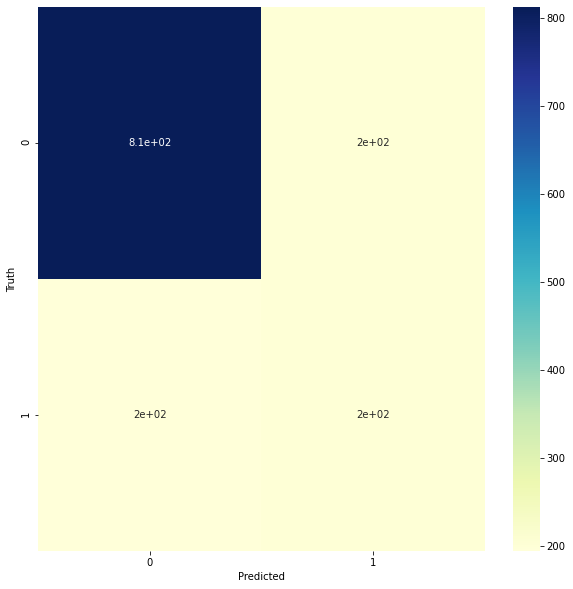

In [38]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report
cm = confusion_matrix(y_test,y_pred_conv)
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Truth')

print(classification_report(y_test,y_pred_conv))
print(accuracy_score(y_test,y_pred_conv))

# Method 3: SMOTE (uses Kneighbours for creating synthetic samples of minority class)

In [39]:
X = df1.drop('Churn',axis='columns')
y = df1['Churn']

In [44]:
y.value_counts() #imbalanced data set

0    5174
1    1869
Name: Churn, dtype: int64

In [42]:
!pip install imbalanced-learn

In [43]:
from imblearn.over_sampling import SMOTE

In [47]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X,y)

In [48]:
y_sm.value_counts()

1    5174
0    5174
Name: Churn, dtype: int64

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm,test_size=0.2,stratify=y_sm)
print(len(X_train),len(X_test))

8278 2070


In [65]:
model = keras.Sequential([
    keras.layers.Dense(X_train.shape[1], input_shape=(26,), activation='relu'),
    keras.layers.Dense(260, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(130, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1,activation='sigmoid')
])

In [66]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train, y_train, epochs=500)

Epoch 1/500
259/259 [==============================] - 0s 1ms/step - loss: 0.5194 - accuracy: 0.7411
Epoch 2/500
259/259 [==============================] - 0s 1ms/step - loss: 0.4741 - accuracy: 0.7741
Epoch 3/500
259/259 [==============================] - 0s 1ms/step - loss: 0.4641 - accuracy: 0.7793
Epoch 4/500
259/259 [==============================] - 0s 1ms/step - loss: 0.4601 - accuracy: 0.7826
Epoch 5/500
259/259 [==============================] - 0s 1ms/step - loss: 0.4532 - accuracy: 0.7852
Epoch 6/500
259/259 [==============================] - 0s 1ms/step - loss: 0.4418 - accuracy: 0.7929
Epoch 7/500
259/259 [==============================] - 0s 1ms/step - loss: 0.4378 - accuracy: 0.7978
Epoch 8/500
259/259 [==============================] - 0s 1ms/step - loss: 0.4315 - accuracy: 0.8029
Epoch 9/500
259/259 [==============================] - 0s 1ms/step - loss: 0.4279 - accuracy: 0.8026
Epoch 10/500
259/259 [==============================] - 0s 1ms/step - loss: 0.4248 - accura

259/259 [==============================] - 0s 1ms/step - loss: 0.2753 - accuracy: 0.8794
Epoch 82/500
259/259 [==============================] - 0s 1ms/step - loss: 0.2796 - accuracy: 0.8782
Epoch 83/500
259/259 [==============================] - 0s 1ms/step - loss: 0.2807 - accuracy: 0.8790
Epoch 84/500
259/259 [==============================] - 0s 1ms/step - loss: 0.2808 - accuracy: 0.8779
Epoch 85/500
259/259 [==============================] - 0s 1ms/step - loss: 0.2822 - accuracy: 0.8805
Epoch 86/500
259/259 [==============================] - 0s 1ms/step - loss: 0.2787 - accuracy: 0.8776
Epoch 87/500
259/259 [==============================] - 0s 1ms/step - loss: 0.2709 - accuracy: 0.8833
Epoch 88/500
259/259 [==============================] - 0s 1ms/step - loss: 0.2754 - accuracy: 0.8814
Epoch 89/500
259/259 [==============================] - 0s 1ms/step - loss: 0.2782 - accuracy: 0.8785
Epoch 90/500
259/259 [==============================] - 0s 1ms/step - loss: 0.2753 - accuracy: 

259/259 [==============================] - 0s 1ms/step - loss: 0.2384 - accuracy: 0.8986
Epoch 161/500
259/259 [==============================] - 0s 1ms/step - loss: 0.2309 - accuracy: 0.9020
Epoch 162/500
259/259 [==============================] - 0s 1ms/step - loss: 0.2337 - accuracy: 0.9001
Epoch 163/500
259/259 [==============================] - 0s 1ms/step - loss: 0.2284 - accuracy: 0.8988
Epoch 164/500
259/259 [==============================] - 0s 1ms/step - loss: 0.2343 - accuracy: 0.8990
Epoch 165/500
259/259 [==============================] - 0s 1ms/step - loss: 0.2321 - accuracy: 0.9013
Epoch 166/500
259/259 [==============================] - 0s 1ms/step - loss: 0.2299 - accuracy: 0.9003
Epoch 167/500
259/259 [==============================] - 0s 1ms/step - loss: 0.2359 - accuracy: 0.8983
Epoch 168/500
259/259 [==============================] - 0s 1ms/step - loss: 0.2306 - accuracy: 0.8988
Epoch 169/500
259/259 [==============================] - 0s 1ms/step - loss: 0.2310 - a

259/259 [==============================] - 0s 1ms/step - loss: 0.2112 - accuracy: 0.9049
Epoch 240/500
259/259 [==============================] - 0s 1ms/step - loss: 0.2141 - accuracy: 0.9070
Epoch 241/500
259/259 [==============================] - 0s 1ms/step - loss: 0.2087 - accuracy: 0.9084
Epoch 242/500
259/259 [==============================] - 0s 1ms/step - loss: 0.2139 - accuracy: 0.9077
Epoch 243/500
259/259 [==============================] - 0s 1ms/step - loss: 0.2098 - accuracy: 0.9065
Epoch 244/500
259/259 [==============================] - 0s 1ms/step - loss: 0.2148 - accuracy: 0.9048
Epoch 245/500
259/259 [==============================] - 0s 1ms/step - loss: 0.2163 - accuracy: 0.9023
Epoch 246/500
259/259 [==============================] - 0s 1ms/step - loss: 0.2161 - accuracy: 0.9094
Epoch 247/500
259/259 [==============================] - 0s 1ms/step - loss: 0.2093 - accuracy: 0.9083
Epoch 248/500
259/259 [==============================] - 0s 1ms/step - loss: 0.2054 - a

259/259 [==============================] - 0s 1ms/step - loss: 0.2038 - accuracy: 0.9087
Epoch 319/500
259/259 [==============================] - 0s 1ms/step - loss: 0.1985 - accuracy: 0.9135
Epoch 320/500
259/259 [==============================] - 0s 1ms/step - loss: 0.2004 - accuracy: 0.9115
Epoch 321/500
259/259 [==============================] - 0s 1ms/step - loss: 0.1956 - accuracy: 0.9136
Epoch 322/500
259/259 [==============================] - 0s 1ms/step - loss: 0.2006 - accuracy: 0.9127
Epoch 323/500
259/259 [==============================] - 0s 1ms/step - loss: 0.1942 - accuracy: 0.9146
Epoch 324/500
259/259 [==============================] - 0s 1ms/step - loss: 0.1958 - accuracy: 0.9158
Epoch 325/500
259/259 [==============================] - 0s 1ms/step - loss: 0.1977 - accuracy: 0.9145
Epoch 326/500
259/259 [==============================] - 0s 1ms/step - loss: 0.2010 - accuracy: 0.9139
Epoch 327/500
259/259 [==============================] - 0s 1ms/step - loss: 0.1960 - a

259/259 [==============================] - 0s 1ms/step - loss: 0.1848 - accuracy: 0.9201
Epoch 398/500
259/259 [==============================] - 0s 1ms/step - loss: 0.1909 - accuracy: 0.9174
Epoch 399/500
259/259 [==============================] - 0s 1ms/step - loss: 0.1913 - accuracy: 0.9176
Epoch 400/500
259/259 [==============================] - 0s 1ms/step - loss: 0.1883 - accuracy: 0.9180
Epoch 401/500
259/259 [==============================] - 0s 1ms/step - loss: 0.1895 - accuracy: 0.9201
Epoch 402/500
259/259 [==============================] - 0s 1ms/step - loss: 0.1844 - accuracy: 0.9194
Epoch 403/500
259/259 [==============================] - 0s 1ms/step - loss: 0.1886 - accuracy: 0.9183
Epoch 404/500
259/259 [==============================] - 0s 1ms/step - loss: 0.1963 - accuracy: 0.9152
Epoch 405/500
259/259 [==============================] - 0s 1ms/step - loss: 0.1931 - accuracy: 0.9154
Epoch 406/500
259/259 [==============================] - 0s 1ms/step - loss: 0.1876 - a

259/259 [==============================] - 0s 1ms/step - loss: 0.1850 - accuracy: 0.9206
Epoch 477/500
259/259 [==============================] - 0s 1ms/step - loss: 0.1813 - accuracy: 0.9217
Epoch 478/500
259/259 [==============================] - 0s 1ms/step - loss: 0.1833 - accuracy: 0.9175
Epoch 479/500
259/259 [==============================] - 0s 1ms/step - loss: 0.1832 - accuracy: 0.9204
Epoch 480/500
259/259 [==============================] - 0s 1ms/step - loss: 0.1878 - accuracy: 0.9162
Epoch 481/500
259/259 [==============================] - 0s 1ms/step - loss: 0.1822 - accuracy: 0.9212
Epoch 482/500
259/259 [==============================] - 0s 1ms/step - loss: 0.1817 - accuracy: 0.9217
Epoch 483/500
259/259 [==============================] - 0s 1ms/step - loss: 0.1790 - accuracy: 0.9187
Epoch 484/500
259/259 [==============================] - 0s 1ms/step - loss: 0.1904 - accuracy: 0.9183
Epoch 485/500
259/259 [==============================] - 0s 1ms/step - loss: 0.1800 - a

In [67]:
model.evaluate(X_test,y_test)

65/65 [==============================] - 0s 496us/step - loss: 0.6933 - accuracy: 0.8232


[0.6933498978614807, 0.8231884241104126]

In [68]:
y_pred = model.predict(X_test)

In [69]:
y_pred # has probabilities

y_pred_conv = np.where(y_pred>=0.5,1,0)
y_pred[:5], y_pred_conv[:5]

(array([[9.8509884e-01],
        [3.9631671e-01],
        [4.1615014e-05],
        [8.4774029e-01],
        [1.0448784e-02]], dtype=float32),
 array([[1],
        [0],
        [0],
        [1],
        [0]]))

[[784 251]
 [115 920]]
              precision    recall  f1-score   support

           0       0.87      0.76      0.81      1035
           1       0.79      0.89      0.83      1035

    accuracy                           0.82      2070
   macro avg       0.83      0.82      0.82      2070
weighted avg       0.83      0.82      0.82      2070

0.8231884057971014


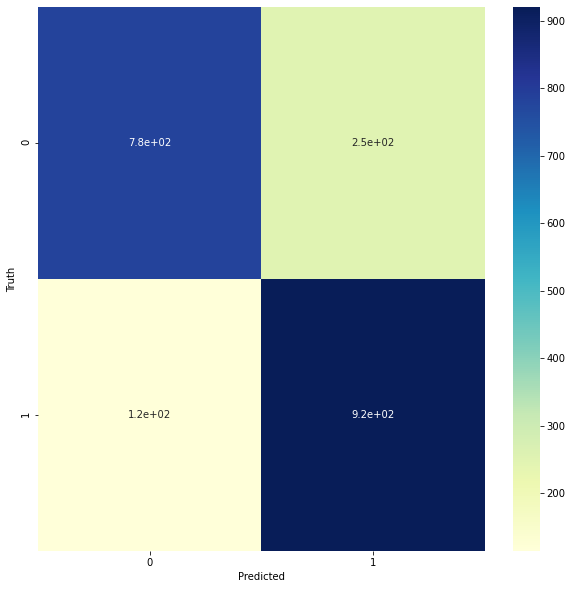

In [70]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report
cm = confusion_matrix(y_test,y_pred_conv)
print(cm)
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Truth')

print(classification_report(y_test,y_pred_conv))
print(accuracy_score(y_test,y_pred_conv))